# Example of PET reconstruction of a 3D Static acquisition of a digital phantom

In [1]:
import sys
import os
import tomolab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

### Inizialize PET_Static_Scan object

In [2]:
pet = tomolab.Reconstruction.PET_Static_Scan()

In [3]:
print('DEFAULT PARAMETERS')
print('-------------------------------------------------------')
print(f'FOV size [mm]:        {pet.activity_size}')
print(f'FOV shape [voxels]:   {pet.activity_shape}')
print(f'Resolution [mm]:      {pet.resolution}')
print(f'Pixel sizie [mm]:     {pet.pixel_size}')
print(f'Slice thickness [mm]: {pet.slice_thickness}')
print(' ')
print(pet.activity_projection_parameters)
print(pet.activity_backprojection_parameters)

DEFAULT PARAMETERS
-------------------------------------------------------
FOV size [mm]:        [256. 256. 256.]
FOV shape [voxels]:   [128 128 128]
Resolution [mm]:      [2. 2. 2.]
Pixel sizie [mm]:     [2. 2.]
Slice thickness [mm]: 2.0
 
PET Projection Parameters: 
 - N_samples:                150 
 - sample_step:              2.956033 
 - background_activity:      0.000000 
 - background_attenuation:   0.000000 
 - truncate_negative_values: 0.000000 
 - gpu_acceleration:         1 
 - direction:                5 
 - block_size:               1024 

PET Backprojection Parameters: 
 - N_samples:                150 
 - sample_step:              2.956033 
 - background_activity:      0.000000 
 - background_attenuation:   0.000000 
 - truncate_negative_values: 0.000000 
 - gpu_acceleration:         1 
 - direction:                5 
 - block_size:               1024 



### Set shape properties of image data

In [6]:
shape = np.asarray([128,128,128]) # we are going to deal with a 3D phantom in this notebook
size  = np.asarray([2.08626, 2.08626, 2.03125])*shape
pet.set_activity_shape(shape)
pet.set_activity_size(size)
pet.set_attenuation_shape(shape)
pet.set_attenuation_size(size)

In [7]:
print('CUSTOM PARAMETERS')
print('-------------------------------------------------------')
print(f'FOV size [mm]:        {pet.activity_size}')
print(f'FOV shape [voxels]:   {pet.activity_shape}')
print(f'Resolution [mm]:      {pet.resolution}')
print(f'Pixel sizie [mm]:     {pet.pixel_size}')
print(f'Slice thickness [mm]: {pet.slice_thickness}')
print(' ')
print(pet.activity_projection_parameters)
print(pet.activity_backprojection_parameters)

CUSTOM PARAMETERS
-------------------------------------------------------
FOV size [mm]:        [267.04128 267.04128 260.     ]
FOV shape [voxels]:   [128 128 128]
Resolution [mm]:      [2.08626 2.08626 2.03125]
Pixel sizie [mm]:     [2.08626 2.08626]
Slice thickness [mm]: 2.03125
 
PET Projection Parameters: 
 - N_samples:                150 
 - sample_step:              3.056665 
 - background_activity:      0.000000 
 - background_attenuation:   0.000000 
 - truncate_negative_values: 0.000000 
 - gpu_acceleration:         1 
 - direction:                5 
 - block_size:               1024 

PET Backprojection Parameters: 
 - N_samples:                150 
 - sample_step:              3.056665 
 - background_activity:      0.000000 
 - background_attenuation:   0.000000 
 - truncate_negative_values: 0.000000 
 - gpu_acceleration:         1 
 - direction:                5 
 - block_size:               1024 



### Set scan properties according to the scanner geometry we want to simulate

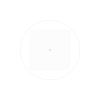

In [8]:
pet.binning.N_axial = 90
pet.binning.N_azimuthal = 11
pet.binning.N_u = shape[0]
pet.binning.N_v = shape[2]
pet.binning.size_u = size[0]
pet.binning.size_v = size[2]
pet.binning.angles_axial = np.linspace(0,np.pi,pet.binning.N_axial) #rad
pet.binning.angles_azimuthal = np.linspace(-0.5,0.5,pet.binning.N_azimuthal) #rad 
pet.set_binning(pet.binning)

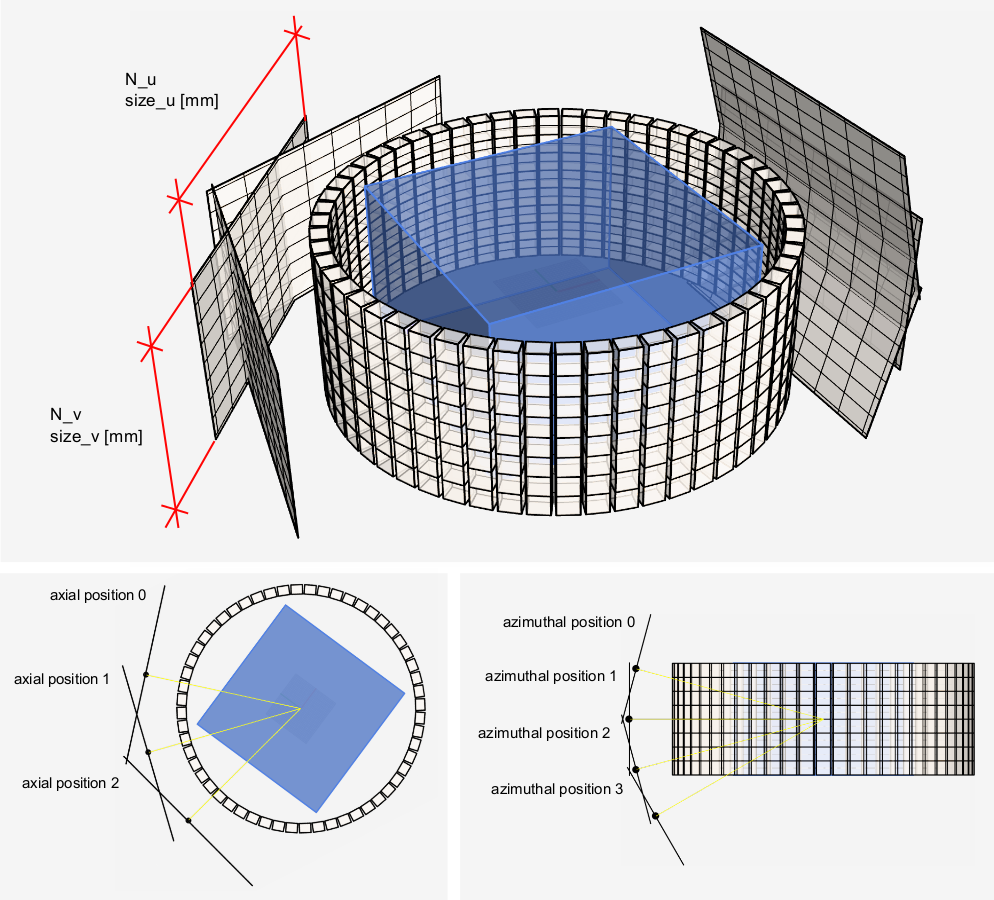

In [9]:
pet.binning.display_geometry()

### Phantom simulation

In [10]:
activity = tomolab.DataSources.Synthetic.Shapes.complex_phantom(
                shape=shape,
                size=size,
                center=size/2,
                radius=110,
                insert_radius=70,
                hole_radius=30,
                length=200,
                insert_length=150,
                insert_min_radius=7,
                insert_max_radius=25,
                insert_N_elems=8,
                inner_value=1.0,
                insert_value=1.0,
                outer_value=0.0,
                axis=2,
            )

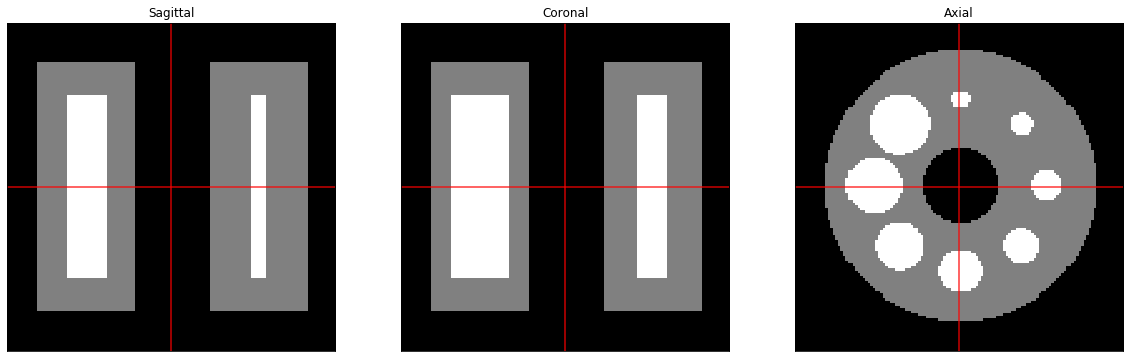

In [11]:
activity.display(res=pet.resolution, cmap='gray')

### Project ideal simualted activity

In [12]:
projection = pet.project_activity(activity)

In [13]:
projection.to_nd_array().shape

(90, 11, 128, 128)

Sinogram total counts: 1901149952.0


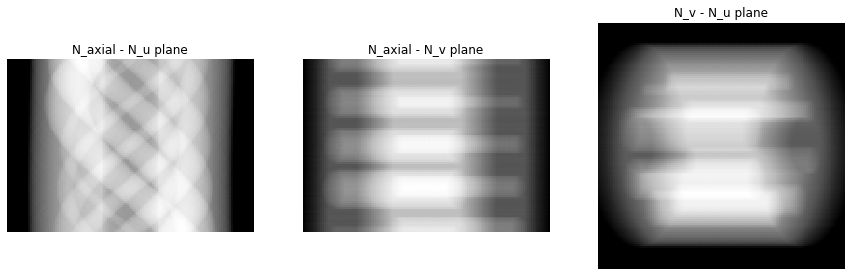

In [14]:
f, axarr = plt.subplots(1,3,figsize=(15,5))
axarr[0].imshow(projection.to_nd_array()[:,0,:,64], cmap = cm.Greys_r)
axarr[0].set_title('N_axial - N_u plane')
axarr[0].axis('off')

axarr[1].imshow(projection.to_nd_array()[:,0,64,:], cmap = cm.Greys_r)
axarr[1].set_title('N_axial - N_v plane')
axarr[1].axis('off')

axarr[2].imshow(projection.to_nd_array()[60,0,:,:], cmap = cm.Greys_r)
axarr[2].set_title('N_v - N_u plane')
axarr[2].axis('off')

print(f'Sinogram total counts: {projection.get_integral()}')

### Apply Poisson noise to simualted measurment and set the simulated ideal prompts as measurment in the PET_Static_Scan instance

In [15]:
projection.apply_noise_Poisson()
pet.set_prompts(projection)

Sinogram total counts: 1901166592.0


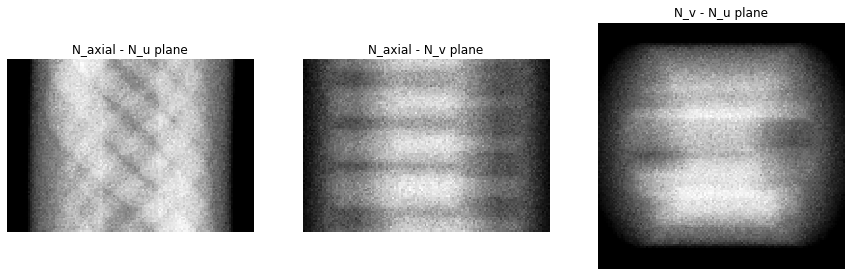

In [16]:
f, axarr = plt.subplots(1,3,figsize=(15,5))
axarr[0].imshow(pet.prompts.to_nd_array()[:,0,:,64], cmap = cm.Greys_r)
axarr[0].set_title('N_axial - N_u plane')
axarr[0].axis('off')

axarr[1].imshow(pet.prompts.to_nd_array()[:,0,64,:], cmap = cm.Greys_r)
axarr[1].set_title('N_axial - N_v plane')
axarr[1].axis('off')

axarr[2].imshow(pet.prompts.to_nd_array()[60,0,:,:], cmap = cm.Greys_r)
axarr[2].set_title('N_v - N_u plane')
axarr[2].axis('off')

print(f'Sinogram total counts: {pet.prompts.get_integral()}')

### Image reconstruction step using OSEM algorithm

In [22]:
init_activity=None
subset_mode='ordered_axial'
subset_number = 15
iterations=3 

In [23]:
osem_rec = pet.osem_reconstruction(iterations=iterations,
                                    activity=init_activity,
                                    subset_mode=subset_mode,
                                    subset_number=subset_number,
                                   )

subset number: 15
subset size: 6
iterations tot: 45


FloatProgress(value=0.0, bar_style='info', description='OSEM Reconstruction', layout=Layout(border='solid 1px'…

In [24]:
pet.profiler.display()

,[ms],[s]
Total reconstruction time :,26738.505,26.739
Total projection time :,366.920,0.367
Total backprojection time :,363.648,0.364


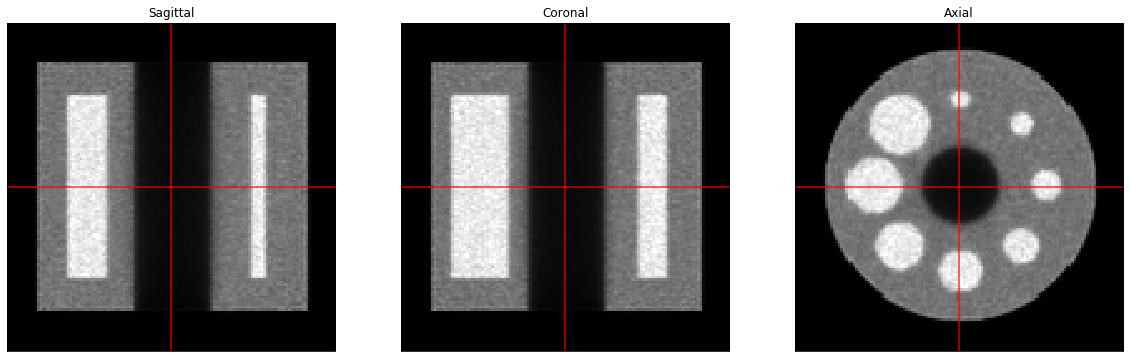

In [25]:
osem_rec.display(res=pet.resolution, cmap='gray', clim=(0,2.2))

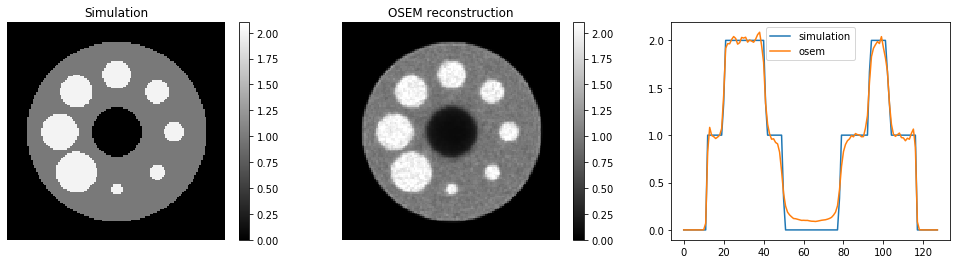

In [31]:
f, axarr = plt.subplots(1,3,figsize=(17,4))
im = axarr[0].imshow(activity.get_data()[:,:,64], cmap = 'gray', vmax=2.1)
axarr[0].set_title('Simulation')
axarr[0].axis('off')
f.colorbar(im, ax=axarr[0])

im = axarr[1].imshow(osem_rec.get_data()[:,:,64], cmap = 'gray', vmax=2.1)
axarr[1].set_title('OSEM reconstruction')
axarr[1].axis('off')
f.colorbar(im, ax=axarr[1])

axarr[2].plot(np.mean(activity.get_data()[60:63,:,60:63],axis=(0,2)),label='simulation')
axarr[2].plot(np.mean(osem_rec.get_data()[60:63,:,60:63],axis=(0,2)),label='osem')
axarr[2].set_title('   ')
plt.legend()

### Image reconstruction step using MLEM algorithm

In [27]:
mlem_rec = pet.mlem_reconstruction(iterations=40,
                                    activity=init_activity,
                                   )

FloatProgress(value=0.0, bar_style='info', description='MLEM Reconstruction', layout=Layout(border='solid 1px'…

In [28]:
pet.profiler.display()

,[ms],[s]
Total reconstruction time :,330431.642,330.432
Total projection time :,5181.123,5.181
Total backprojection time :,5304.209,5.304


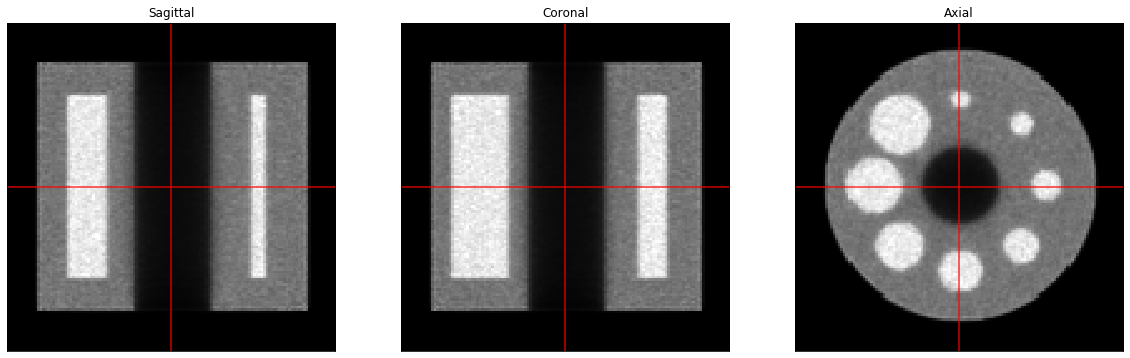

In [29]:
mlem_rec.display(res=pet.resolution, cmap='gray', clim=(0,2.2))

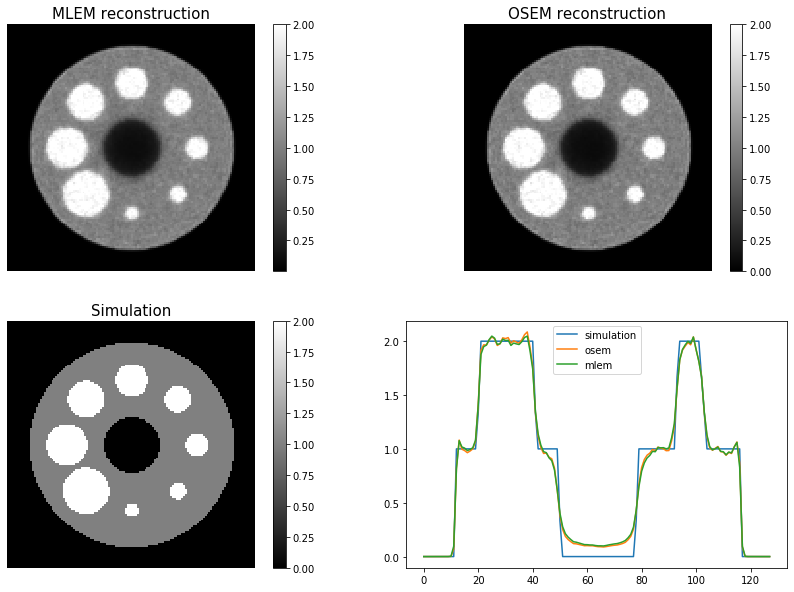

In [45]:
f, axarr = plt.subplots(2,2,figsize=(15,10))

im = axarr[0,0].imshow(mlem_rec.get_data()[:,:,64], cmap = 'gray',vmax=2.0)
axarr[0,0].set_title('MLEM reconstruction', fontsize=15)
axarr[0,0].axis('off')
f.colorbar(im, ax=axarr[0,0])

im = axarr[0,1].imshow(osem_rec.get_data()[:,:,64], cmap = 'gray',vmax=2.0)
axarr[0,1].set_title('OSEM reconstruction', fontsize=15)
axarr[0,1].axis('off')
f.colorbar(im, ax=axarr[0,1])

im = axarr[1,0].imshow(activity.get_data()[:,:,64], cmap = 'gray',vmax=2.0)
axarr[1,0].set_title('Simulation', fontsize=15)
axarr[1,0].axis('off')
f.colorbar(im, ax=axarr[1,0])
              
axarr[1,1].plot(np.mean(activity.get_data()[60:63,:,60:63],axis=(0,2)),label='simulation')
axarr[1,1].plot(np.mean(osem_rec.get_data()[60:63,:,60:63],axis=(0,2)),label='osem')
axarr[1,1].plot(np.mean(mlem_rec.get_data()[60:63,:,60:63],axis=(0,2)),label='mlem')
axarr[1,1].set_title('   ')
plt.legend()